In [1]:
# Python 3.9.13, maybe we can set up docker
import pandas as pd
df = pd.read_csv("Data/fm_player_data.csv")

In [2]:
# Remove double quotes
df.columns = df.columns.str.replace('"', '')
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

# Display the modified DataFrame
print(df)

<ipython-input-2-55775c8e3c7a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


      Unnamed: 0   player_id                 Name                        DoB  \
0              1     7458500         Lionel Messi   6/24/1987 (35 years old)   
1              2    14157184  Alexis Mac Allister  12/24/1998 (24 years old)   
2              3    48037335        Marcus Thuram    8/6/1997 (25 years old)   
3              4      735216    Cristiano Ronaldo    2/5/1985 (38 years old)   
4              5    55041632       Bernardo Silva   8/10/1994 (28 years old)   
...          ...         ...                  ...                        ...   
9967        9968    77063200      Jhamir D'Arrigo  11/15/1999 (23 years old)   
9968        9969    77029252        Angelo Campos   4/27/1993 (30 years old)   
9969        9970  2000097222     Lisandro Vásquez   1/30/2003 (20 years old)   
9970        9971    78047041        Gabriel Costa    4/2/1990 (33 years old)   
9971        9972    77055658      Alejandro Ramos   9/13/1998 (24 years old)   

             Position                 C

In [9]:
from mplsoccer import radar_chart,Radar, FontManager, grid
import matplotlib.pyplot as plt

In [13]:
# parameter names of the statistics we want to show
params = ["Current Ability", "Potential Ability","Crossing"]

# The lower and upper boundaries for the statistics
low =  [100,100,0]
high = [200,200,20]

# Add anything to this list where having a lower number is better
# this flips the statistic
#lower_is_better = ['Miscontrol']

In [6]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [14]:
endrick_values =   [114,187,7]

In [15]:
radar = Radar(params, low, high,
              #lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

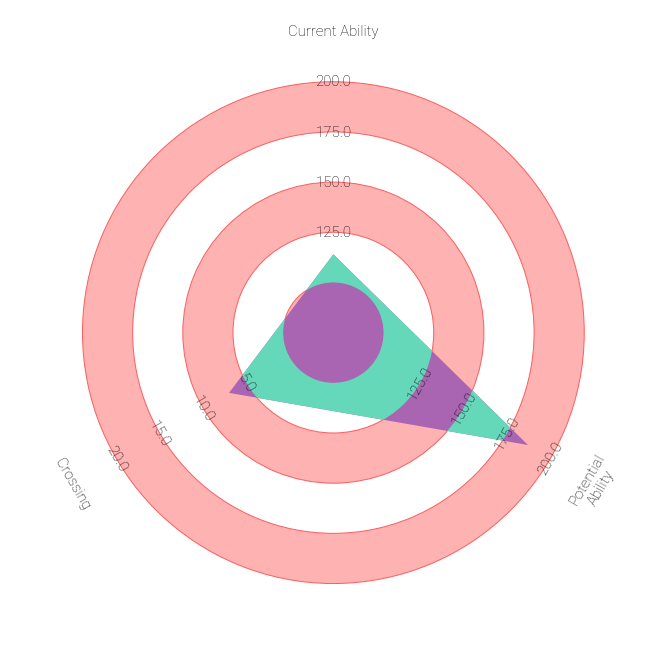

In [17]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(endrick_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels